Note: this analysis is for 13/83-4

TODO: requires 20 GB memory, make it more memory efficient?

## Get states for each work trajectory for Q83R

In [1]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.new_topology, htf.new_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    new_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_new.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_new.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[0])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), new_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    traj = md.Trajectory(np.array(all_pos_reverse), new_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [3]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/84/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [4]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [5]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'], ['N', 'CA', 'CB', 'CG']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '83' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '83' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [6]:
indices_old

[1212, 1213, 1216, 1217]

In [7]:
indices_new

[1212, 1213, 1216, 1217]

In [8]:
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]

new files found: 100


#### Get dihedrals for complex

In [9]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/84/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [10]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [11]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'], ['N', 'CA', 'CB', 'CG']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '83' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '83' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [12]:
indices_old

[1212, 1213, 1216, 1217]

In [13]:
indices_new

[1212, 1213, 1216, 1217]

In [14]:
for atom in htf._topology_proposal.new_topology.atoms():
    print(atom)

<Atom 0 (CH3) of chain 0 residue 0 (ACE)>
<Atom 1 (C) of chain 0 residue 0 (ACE)>
<Atom 2 (O) of chain 0 residue 0 (ACE)>
<Atom 3 (H1) of chain 0 residue 0 (ACE)>
<Atom 4 (H2) of chain 0 residue 0 (ACE)>
<Atom 5 (H3) of chain 0 residue 0 (ACE)>
<Atom 6 (N) of chain 0 residue 1 (VAL)>
<Atom 7 (CA) of chain 0 residue 1 (VAL)>
<Atom 8 (C) of chain 0 residue 1 (VAL)>
<Atom 9 (O) of chain 0 residue 1 (VAL)>
<Atom 10 (CB) of chain 0 residue 1 (VAL)>
<Atom 11 (CG1) of chain 0 residue 1 (VAL)>
<Atom 12 (CG2) of chain 0 residue 1 (VAL)>
<Atom 13 (H) of chain 0 residue 1 (VAL)>
<Atom 14 (HA) of chain 0 residue 1 (VAL)>
<Atom 15 (HB) of chain 0 residue 1 (VAL)>
<Atom 16 (HG11) of chain 0 residue 1 (VAL)>
<Atom 17 (HG12) of chain 0 residue 1 (VAL)>
<Atom 18 (HG13) of chain 0 residue 1 (VAL)>
<Atom 19 (HG21) of chain 0 residue 1 (VAL)>
<Atom 20 (HG22) of chain 0 residue 1 (VAL)>
<Atom 21 (HG23) of chain 0 residue 1 (VAL)>
<Atom 22 (N) of chain 0 residue 2 (ILE)>
<Atom 23 (CA) of chain 0 residue 2 (

<Atom 5197 (H1) of chain 3 residue 883 (HOH)>
<Atom 5198 (H2) of chain 3 residue 883 (HOH)>
<Atom 5199 (O) of chain 3 residue 884 (HOH)>
<Atom 5200 (H1) of chain 3 residue 884 (HOH)>
<Atom 5201 (H2) of chain 3 residue 884 (HOH)>
<Atom 5202 (O) of chain 3 residue 885 (HOH)>
<Atom 5203 (H1) of chain 3 residue 885 (HOH)>
<Atom 5204 (H2) of chain 3 residue 885 (HOH)>
<Atom 5205 (O) of chain 3 residue 886 (HOH)>
<Atom 5206 (H1) of chain 3 residue 886 (HOH)>
<Atom 5207 (H2) of chain 3 residue 886 (HOH)>
<Atom 5208 (O) of chain 3 residue 887 (HOH)>
<Atom 5209 (H1) of chain 3 residue 887 (HOH)>
<Atom 5210 (H2) of chain 3 residue 887 (HOH)>
<Atom 5211 (O) of chain 3 residue 888 (HOH)>
<Atom 5212 (H1) of chain 3 residue 888 (HOH)>
<Atom 5213 (H2) of chain 3 residue 888 (HOH)>
<Atom 5214 (O) of chain 3 residue 889 (HOH)>
<Atom 5215 (H1) of chain 3 residue 889 (HOH)>
<Atom 5216 (H2) of chain 3 residue 889 (HOH)>
<Atom 5217 (O) of chain 3 residue 890 (HOH)>
<Atom 5218 (H1) of chain 3 residue 890 (H

<Atom 10696 (H1) of chain 3 residue 2716 (HOH)>
<Atom 10697 (H2) of chain 3 residue 2716 (HOH)>
<Atom 10698 (O) of chain 3 residue 2717 (HOH)>
<Atom 10699 (H1) of chain 3 residue 2717 (HOH)>
<Atom 10700 (H2) of chain 3 residue 2717 (HOH)>
<Atom 10701 (O) of chain 3 residue 2718 (HOH)>
<Atom 10702 (H1) of chain 3 residue 2718 (HOH)>
<Atom 10703 (H2) of chain 3 residue 2718 (HOH)>
<Atom 10704 (O) of chain 3 residue 2719 (HOH)>
<Atom 10705 (H1) of chain 3 residue 2719 (HOH)>
<Atom 10706 (H2) of chain 3 residue 2719 (HOH)>
<Atom 10707 (O) of chain 3 residue 2720 (HOH)>
<Atom 10708 (H1) of chain 3 residue 2720 (HOH)>
<Atom 10709 (H2) of chain 3 residue 2720 (HOH)>
<Atom 10710 (O) of chain 3 residue 2721 (HOH)>
<Atom 10711 (H1) of chain 3 residue 2721 (HOH)>
<Atom 10712 (H2) of chain 3 residue 2721 (HOH)>
<Atom 10713 (O) of chain 3 residue 2722 (HOH)>
<Atom 10714 (H1) of chain 3 residue 2722 (HOH)>
<Atom 10715 (H2) of chain 3 residue 2722 (HOH)>
<Atom 10716 (O) of chain 3 residue 2723 (HOH)>

<Atom 16696 (H1) of chain 3 residue 4716 (HOH)>
<Atom 16697 (H2) of chain 3 residue 4716 (HOH)>
<Atom 16698 (O) of chain 3 residue 4717 (HOH)>
<Atom 16699 (H1) of chain 3 residue 4717 (HOH)>
<Atom 16700 (H2) of chain 3 residue 4717 (HOH)>
<Atom 16701 (O) of chain 3 residue 4718 (HOH)>
<Atom 16702 (H1) of chain 3 residue 4718 (HOH)>
<Atom 16703 (H2) of chain 3 residue 4718 (HOH)>
<Atom 16704 (O) of chain 3 residue 4719 (HOH)>
<Atom 16705 (H1) of chain 3 residue 4719 (HOH)>
<Atom 16706 (H2) of chain 3 residue 4719 (HOH)>
<Atom 16707 (O) of chain 3 residue 4720 (HOH)>
<Atom 16708 (H1) of chain 3 residue 4720 (HOH)>
<Atom 16709 (H2) of chain 3 residue 4720 (HOH)>
<Atom 16710 (O) of chain 3 residue 4721 (HOH)>
<Atom 16711 (H1) of chain 3 residue 4721 (HOH)>
<Atom 16712 (H2) of chain 3 residue 4721 (HOH)>
<Atom 16713 (O) of chain 3 residue 4722 (HOH)>
<Atom 16714 (H1) of chain 3 residue 4722 (HOH)>
<Atom 16715 (H2) of chain 3 residue 4722 (HOH)>
<Atom 16716 (O) of chain 3 residue 4723 (HOH)>

<Atom 22695 (O) of chain 3 residue 6716 (HOH)>
<Atom 22696 (H1) of chain 3 residue 6716 (HOH)>
<Atom 22697 (H2) of chain 3 residue 6716 (HOH)>
<Atom 22698 (O) of chain 3 residue 6717 (HOH)>
<Atom 22699 (H1) of chain 3 residue 6717 (HOH)>
<Atom 22700 (H2) of chain 3 residue 6717 (HOH)>
<Atom 22701 (O) of chain 3 residue 6718 (HOH)>
<Atom 22702 (H1) of chain 3 residue 6718 (HOH)>
<Atom 22703 (H2) of chain 3 residue 6718 (HOH)>
<Atom 22704 (O) of chain 3 residue 6719 (HOH)>
<Atom 22705 (H1) of chain 3 residue 6719 (HOH)>
<Atom 22706 (H2) of chain 3 residue 6719 (HOH)>
<Atom 22707 (O) of chain 3 residue 6720 (HOH)>
<Atom 22708 (H1) of chain 3 residue 6720 (HOH)>
<Atom 22709 (H2) of chain 3 residue 6720 (HOH)>
<Atom 22710 (O) of chain 3 residue 6721 (HOH)>
<Atom 22711 (H1) of chain 3 residue 6721 (HOH)>
<Atom 22712 (H2) of chain 3 residue 6721 (HOH)>
<Atom 22713 (O) of chain 3 residue 6722 (HOH)>
<Atom 22714 (H1) of chain 3 residue 6722 (HOH)>
<Atom 22715 (H2) of chain 3 residue 6722 (HOH)>

<Atom 28695 (O) of chain 3 residue 8716 (HOH)>
<Atom 28696 (H1) of chain 3 residue 8716 (HOH)>
<Atom 28697 (H2) of chain 3 residue 8716 (HOH)>
<Atom 28698 (O) of chain 3 residue 8717 (HOH)>
<Atom 28699 (H1) of chain 3 residue 8717 (HOH)>
<Atom 28700 (H2) of chain 3 residue 8717 (HOH)>
<Atom 28701 (O) of chain 3 residue 8718 (HOH)>
<Atom 28702 (H1) of chain 3 residue 8718 (HOH)>
<Atom 28703 (H2) of chain 3 residue 8718 (HOH)>
<Atom 28704 (O) of chain 3 residue 8719 (HOH)>
<Atom 28705 (H1) of chain 3 residue 8719 (HOH)>
<Atom 28706 (H2) of chain 3 residue 8719 (HOH)>
<Atom 28707 (O) of chain 3 residue 8720 (HOH)>
<Atom 28708 (H1) of chain 3 residue 8720 (HOH)>
<Atom 28709 (H2) of chain 3 residue 8720 (HOH)>
<Atom 28710 (O) of chain 3 residue 8721 (HOH)>
<Atom 28711 (H1) of chain 3 residue 8721 (HOH)>
<Atom 28712 (H2) of chain 3 residue 8721 (HOH)>
<Atom 28713 (O) of chain 3 residue 8722 (HOH)>
<Atom 28714 (H1) of chain 3 residue 8722 (HOH)>
<Atom 28715 (H2) of chain 3 residue 8722 (HOH)>

In [15]:
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:27<00:00,  3.59it/s]


new files found: 100


In [16]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [17]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [18]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

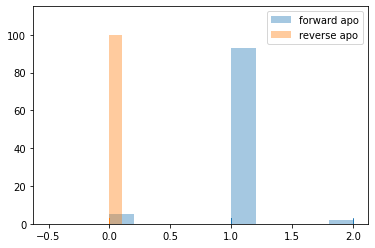

In [19]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

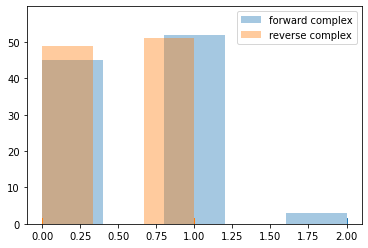

In [20]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

## Run estimator on Q83R

In [21]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [22]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [24]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["A42T"]
d_results = {}
d_phases = {}
first = 84
for i in tqdm_notebook([84]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 84
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

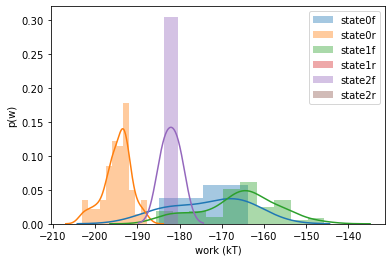

In [25]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

    # Plot work distributions
    for i in [0,1, 2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

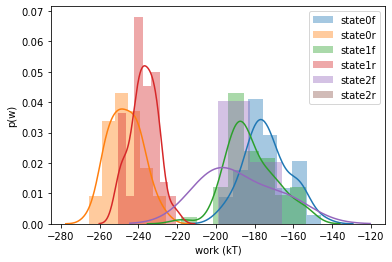

In [26]:
# Plot work distributions
plt.clf()
for i in [0, 1, 2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [28]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(-energy)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['complex'] - d_dgs_phase['apo']

In [29]:
import tqdm
states_apo = [0]
states_complex = [0, 1]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [00:47<00:00, 212.45it/s]


In [30]:
dgs_state_all_A42T = dgs_state_all

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

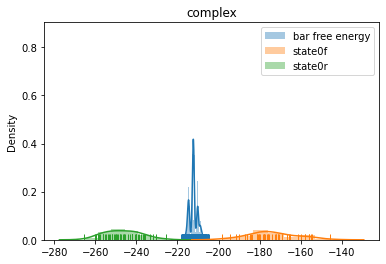

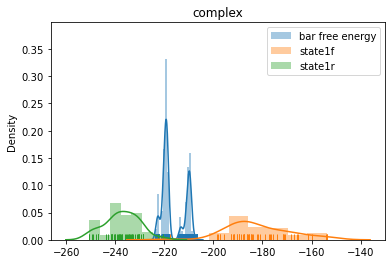

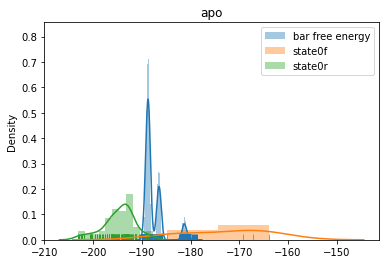

In [31]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

## Get states for each work trajectory for R59A

In [32]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns


In [33]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.old_topology, htf.old_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    old_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_old.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[0])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_old.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), old_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    traj = md.Trajectory(np.array(all_pos_reverse), old_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [34]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/83/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [35]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [36]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'],  ['N', 'CA', 'CB', 'CG']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '83' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '83' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [37]:
indices_old

[1212, 1213, 1216, 1217]

In [38]:
indices_new

[1212, 1213, 1216, 1217]

In [39]:
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:22<00:00,  4.48it/s]

new files found: 100


#### Get dihedrals for complex

In [40]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/83/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [41]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [42]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'], ['N', 'CA', 'CB', 'CG']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '83' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '83' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [43]:
indices_old

[1212, 1213, 1216, 1217]

In [44]:
indices_new

[1212, 1213, 1216, 1217]

In [45]:
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:28<00:00,  3.51it/s]

new files found: 100


In [46]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [47]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [48]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

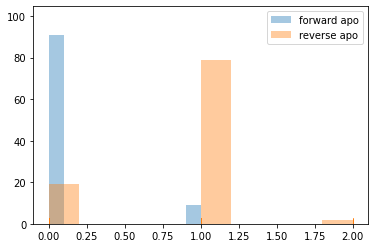

In [49]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

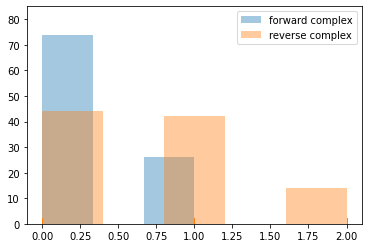

In [50]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

In [51]:
for atom in htf.hybrid_topology.atoms:
    print(atom, atom.index)

ACE2-CH3 0
ACE2-C 1
ACE2-O 2
ACE2-H1 3
ACE2-H2 4
ACE2-H3 5
VAL3-N 6
VAL3-CA 7
VAL3-C 8
VAL3-O 9
VAL3-CB 10
VAL3-CG1 11
VAL3-CG2 12
VAL3-H 13
VAL3-HA 14
VAL3-HB 15
VAL3-HG11 16
VAL3-HG12 17
VAL3-HG13 18
VAL3-HG21 19
VAL3-HG22 20
VAL3-HG23 21
ILE4-N 22
ILE4-CA 23
ILE4-C 24
ILE4-O 25
ILE4-CB 26
ILE4-CG1 27
ILE4-CG2 28
ILE4-CD1 29
ILE4-H 30
ILE4-HA 31
ILE4-HB 32
ILE4-HG13 33
ILE4-HG12 34
ILE4-HG21 35
ILE4-HG22 36
ILE4-HG23 37
ILE4-HD11 38
ILE4-HD12 39
ILE4-HD13 40
ASN5-N 41
ASN5-CA 42
ASN5-C 43
ASN5-O 44
ASN5-CB 45
ASN5-CG 46
ASN5-OD1 47
ASN5-ND2 48
ASN5-H 49
ASN5-HA 50
ASN5-HB2 51
ASN5-HB3 52
ASN5-HD21 53
ASN5-HD22 54
THR6-N 55
THR6-CA 56
THR6-C 57
THR6-O 58
THR6-CB 59
THR6-OG1 60
THR6-CG2 61
THR6-H 62
THR6-HA 63
THR6-HB 64
THR6-HG1 65
THR6-HG21 66
THR6-HG22 67
THR6-HG23 68
PHE7-N 69
PHE7-CA 70
PHE7-C 71
PHE7-O 72
PHE7-CB 73
PHE7-CG 74
PHE7-CD1 75
PHE7-CD2 76
PHE7-CE1 77
PHE7-CE2 78
PHE7-CZ 79
PHE7-H 80
PHE7-HA 81
PHE7-HB3 82
PHE7-HB2 83
PHE7-HD1 84
PHE7-HD2 85
PHE7-HE1 86
PHE7-HE2 87
PHE

LEU51-H 2550
LEU51-HA 2551
LEU51-HB3 2552
LEU51-HB2 2553
LEU51-HG 2554
LEU51-HD11 2555
LEU51-HD12 2556
LEU51-HD13 2557
LEU51-HD21 2558
LEU51-HD22 2559
LEU51-HD23 2560
GLU52-N 2561
GLU52-CA 2562
GLU52-C 2563
GLU52-O 2564
GLU52-CB 2565
GLU52-CG 2566
GLU52-CD 2567
GLU52-OE1 2568
GLU52-OE2 2569
GLU52-H 2570
GLU52-HA 2571
GLU52-HB3 2572
GLU52-HB2 2573
GLU52-HG3 2574
GLU52-HG2 2575
TRP53-N 2576
TRP53-CA 2577
TRP53-C 2578
TRP53-O 2579
TRP53-CB 2580
TRP53-CG 2581
TRP53-CD1 2582
TRP53-CD2 2583
TRP53-NE1 2584
TRP53-CE2 2585
TRP53-CE3 2586
TRP53-CZ2 2587
TRP53-CZ3 2588
TRP53-CH2 2589
TRP53-H 2590
TRP53-HA 2591
TRP53-HB3 2592
TRP53-HB2 2593
TRP53-HD1 2594
TRP53-HE1 2595
TRP53-HE3 2596
TRP53-HZ2 2597
TRP53-HZ3 2598
TRP53-HH2 2599
ARG54-N 2600
ARG54-CA 2601
ARG54-C 2602
ARG54-O 2603
ARG54-CB 2604
ARG54-CG 2605
ARG54-CD 2606
ARG54-NE 2607
ARG54-CZ 2608
ARG54-NH1 2609
ARG54-NH2 2610
ARG54-H 2611
ARG54-HA 2612
ARG54-HB2 2613
ARG54-HB3 2614
ARG54-HG3 2615
ARG54-HG2 2616
ARG54-HD3 2617
ARG54-HD2 2618
ARG

HOH919-H2 5300
HOH920-O 5301
HOH920-H1 5302
HOH920-H2 5303
HOH921-O 5304
HOH921-H1 5305
HOH921-H2 5306
HOH922-O 5307
HOH922-H1 5308
HOH922-H2 5309
HOH923-O 5310
HOH923-H1 5311
HOH923-H2 5312
HOH924-O 5313
HOH924-H1 5314
HOH924-H2 5315
HOH925-O 5316
HOH925-H1 5317
HOH925-H2 5318
HOH926-O 5319
HOH926-H1 5320
HOH926-H2 5321
HOH927-O 5322
HOH927-H1 5323
HOH927-H2 5324
HOH928-O 5325
HOH928-H1 5326
HOH928-H2 5327
HOH929-O 5328
HOH929-H1 5329
HOH929-H2 5330
HOH930-O 5331
HOH930-H1 5332
HOH930-H2 5333
HOH931-O 5334
HOH931-H1 5335
HOH931-H2 5336
HOH932-O 5337
HOH932-H1 5338
HOH932-H2 5339
HOH933-O 5340
HOH933-H1 5341
HOH933-H2 5342
HOH934-O 5343
HOH934-H1 5344
HOH934-H2 5345
HOH935-O 5346
HOH935-H1 5347
HOH935-H2 5348
HOH936-O 5349
HOH936-H1 5350
HOH936-H2 5351
HOH937-O 5352
HOH937-H1 5353
HOH937-H2 5354
HOH938-O 5355
HOH938-H1 5356
HOH938-H2 5357
HOH939-O 5358
HOH939-H1 5359
HOH939-H2 5360
HOH940-O 5361
HOH940-H1 5362
HOH940-H2 5363
HOH941-O 5364
HOH941-H1 5365
HOH941-H2 5366
HOH942-O 5367
HOH

HOH1838-H1 8050
HOH1838-H2 8051
HOH1839-O 8052
HOH1839-H1 8053
HOH1839-H2 8054
HOH1840-O 8055
HOH1840-H1 8056
HOH1840-H2 8057
HOH1841-O 8058
HOH1841-H1 8059
HOH1841-H2 8060
HOH1842-O 8061
HOH1842-H1 8062
HOH1842-H2 8063
HOH1843-O 8064
HOH1843-H1 8065
HOH1843-H2 8066
HOH1844-O 8067
HOH1844-H1 8068
HOH1844-H2 8069
HOH1845-O 8070
HOH1845-H1 8071
HOH1845-H2 8072
HOH1846-O 8073
HOH1846-H1 8074
HOH1846-H2 8075
HOH1847-O 8076
HOH1847-H1 8077
HOH1847-H2 8078
HOH1848-O 8079
HOH1848-H1 8080
HOH1848-H2 8081
HOH1849-O 8082
HOH1849-H1 8083
HOH1849-H2 8084
HOH1850-O 8085
HOH1850-H1 8086
HOH1850-H2 8087
HOH1851-O 8088
HOH1851-H1 8089
HOH1851-H2 8090
HOH1852-O 8091
HOH1852-H1 8092
HOH1852-H2 8093
HOH1853-O 8094
HOH1853-H1 8095
HOH1853-H2 8096
HOH1854-O 8097
HOH1854-H1 8098
HOH1854-H2 8099
HOH1855-O 8100
HOH1855-H1 8101
HOH1855-H2 8102
HOH1856-O 8103
HOH1856-H1 8104
HOH1856-H2 8105
HOH1857-O 8106
HOH1857-H1 8107
HOH1857-H2 8108
HOH1858-O 8109
HOH1858-H1 8110
HOH1858-H2 8111
HOH1859-O 8112
HOH1859-H1 81

HOH2840-H1 11050
HOH2840-H2 11051
HOH2841-O 11052
HOH2841-H1 11053
HOH2841-H2 11054
HOH2842-O 11055
HOH2842-H1 11056
HOH2842-H2 11057
HOH2843-O 11058
HOH2843-H1 11059
HOH2843-H2 11060
HOH2844-O 11061
HOH2844-H1 11062
HOH2844-H2 11063
HOH2845-O 11064
HOH2845-H1 11065
HOH2845-H2 11066
HOH2846-O 11067
HOH2846-H1 11068
HOH2846-H2 11069
HOH2847-O 11070
HOH2847-H1 11071
HOH2847-H2 11072
HOH2848-O 11073
HOH2848-H1 11074
HOH2848-H2 11075
HOH2849-O 11076
HOH2849-H1 11077
HOH2849-H2 11078
HOH2850-O 11079
HOH2850-H1 11080
HOH2850-H2 11081
HOH2851-O 11082
HOH2851-H1 11083
HOH2851-H2 11084
HOH2852-O 11085
HOH2852-H1 11086
HOH2852-H2 11087
HOH2853-O 11088
HOH2853-H1 11089
HOH2853-H2 11090
HOH2854-O 11091
HOH2854-H1 11092
HOH2854-H2 11093
HOH2855-O 11094
HOH2855-H1 11095
HOH2855-H2 11096
HOH2856-O 11097
HOH2856-H1 11098
HOH2856-H2 11099
HOH2857-O 11100
HOH2857-H1 11101
HOH2857-H2 11102
HOH2858-O 11103
HOH2858-H1 11104
HOH2858-H2 11105
HOH2859-O 11106
HOH2859-H1 11107
HOH2859-H2 11108
HOH2860-O 11109


HOH3840-O 14049
HOH3840-H1 14050
HOH3840-H2 14051
HOH3841-O 14052
HOH3841-H1 14053
HOH3841-H2 14054
HOH3842-O 14055
HOH3842-H1 14056
HOH3842-H2 14057
HOH3843-O 14058
HOH3843-H1 14059
HOH3843-H2 14060
HOH3844-O 14061
HOH3844-H1 14062
HOH3844-H2 14063
HOH3845-O 14064
HOH3845-H1 14065
HOH3845-H2 14066
HOH3846-O 14067
HOH3846-H1 14068
HOH3846-H2 14069
HOH3847-O 14070
HOH3847-H1 14071
HOH3847-H2 14072
HOH3848-O 14073
HOH3848-H1 14074
HOH3848-H2 14075
HOH3849-O 14076
HOH3849-H1 14077
HOH3849-H2 14078
HOH3850-O 14079
HOH3850-H1 14080
HOH3850-H2 14081
HOH3851-O 14082
HOH3851-H1 14083
HOH3851-H2 14084
HOH3852-O 14085
HOH3852-H1 14086
HOH3852-H2 14087
HOH3853-O 14088
HOH3853-H1 14089
HOH3853-H2 14090
HOH3854-O 14091
HOH3854-H1 14092
HOH3854-H2 14093
HOH3855-O 14094
HOH3855-H1 14095
HOH3855-H2 14096
HOH3856-O 14097
HOH3856-H1 14098
HOH3856-H2 14099
HOH3857-O 14100
HOH3857-H1 14101
HOH3857-H2 14102
HOH3858-O 14103
HOH3858-H1 14104
HOH3858-H2 14105
HOH3859-O 14106
HOH3859-H1 14107
HOH3859-H2 14108


HOH4926-H1 17299
HOH4926-H2 17300
HOH4927-O 17301
HOH4927-H1 17302
HOH4927-H2 17303
HOH4928-O 17304
HOH4928-H1 17305
HOH4928-H2 17306
HOH4929-O 17307
HOH4929-H1 17308
HOH4929-H2 17309
HOH4930-O 17310
HOH4930-H1 17311
HOH4930-H2 17312
HOH4931-O 17313
HOH4931-H1 17314
HOH4931-H2 17315
HOH4932-O 17316
HOH4932-H1 17317
HOH4932-H2 17318
HOH4933-O 17319
HOH4933-H1 17320
HOH4933-H2 17321
HOH4934-O 17322
HOH4934-H1 17323
HOH4934-H2 17324
HOH4935-O 17325
HOH4935-H1 17326
HOH4935-H2 17327
HOH4936-O 17328
HOH4936-H1 17329
HOH4936-H2 17330
HOH4937-O 17331
HOH4937-H1 17332
HOH4937-H2 17333
HOH4938-O 17334
HOH4938-H1 17335
HOH4938-H2 17336
HOH4939-O 17337
HOH4939-H1 17338
HOH4939-H2 17339
HOH4940-O 17340
HOH4940-H1 17341
HOH4940-H2 17342
HOH4941-O 17343
HOH4941-H1 17344
HOH4941-H2 17345
HOH4942-O 17346
HOH4942-H1 17347
HOH4942-H2 17348
HOH4943-O 17349
HOH4943-H1 17350
HOH4943-H2 17351
HOH4944-O 17352
HOH4944-H1 17353
HOH4944-H2 17354
HOH4945-O 17355
HOH4945-H1 17356
HOH4945-H2 17357
HOH4946-O 17358


HOH5931-H1 20299
HOH5931-H2 20300
HOH5932-O 20301
HOH5932-H1 20302
HOH5932-H2 20303
HOH5933-O 20304
HOH5933-H1 20305
HOH5933-H2 20306
HOH5934-O 20307
HOH5934-H1 20308
HOH5934-H2 20309
HOH5935-O 20310
HOH5935-H1 20311
HOH5935-H2 20312
HOH5936-O 20313
HOH5936-H1 20314
HOH5936-H2 20315
HOH5937-O 20316
HOH5937-H1 20317
HOH5937-H2 20318
HOH5938-O 20319
HOH5938-H1 20320
HOH5938-H2 20321
HOH5939-O 20322
HOH5939-H1 20323
HOH5939-H2 20324
HOH5940-O 20325
HOH5940-H1 20326
HOH5940-H2 20327
HOH5941-O 20328
HOH5941-H1 20329
HOH5941-H2 20330
HOH5942-O 20331
HOH5942-H1 20332
HOH5942-H2 20333
HOH5943-O 20334
HOH5943-H1 20335
HOH5943-H2 20336
HOH5944-O 20337
HOH5944-H1 20338
HOH5944-H2 20339
HOH5945-O 20340
HOH5945-H1 20341
HOH5945-H2 20342
HOH5946-O 20343
HOH5946-H1 20344
HOH5946-H2 20345
HOH5947-O 20346
HOH5947-H1 20347
HOH5947-H2 20348
HOH5948-O 20349
HOH5948-H1 20350
HOH5948-H2 20351
HOH5949-O 20352
HOH5949-H1 20353
HOH5949-H2 20354
HOH5950-O 20355
HOH5950-H1 20356
HOH5950-H2 20357
HOH5951-O 20358


HOH6932-H1 23299
HOH6932-H2 23300
HOH6933-O 23301
HOH6933-H1 23302
HOH6933-H2 23303
HOH6934-O 23304
HOH6934-H1 23305
HOH6934-H2 23306
HOH6935-O 23307
HOH6935-H1 23308
HOH6935-H2 23309
HOH6936-O 23310
HOH6936-H1 23311
HOH6936-H2 23312
HOH6937-O 23313
HOH6937-H1 23314
HOH6937-H2 23315
HOH6938-O 23316
HOH6938-H1 23317
HOH6938-H2 23318
HOH6939-O 23319
HOH6939-H1 23320
HOH6939-H2 23321
HOH6940-O 23322
HOH6940-H1 23323
HOH6940-H2 23324
HOH6941-O 23325
HOH6941-H1 23326
HOH6941-H2 23327
HOH6942-O 23328
HOH6942-H1 23329
HOH6942-H2 23330
HOH6943-O 23331
HOH6943-H1 23332
HOH6943-H2 23333
HOH6944-O 23334
HOH6944-H1 23335
HOH6944-H2 23336
HOH6945-O 23337
HOH6945-H1 23338
HOH6945-H2 23339
HOH6946-O 23340
HOH6946-H1 23341
HOH6946-H2 23342
HOH6947-O 23343
HOH6947-H1 23344
HOH6947-H2 23345
HOH6948-O 23346
HOH6948-H1 23347
HOH6948-H2 23348
HOH6949-O 23349
HOH6949-H1 23350
HOH6949-H2 23351
HOH6950-O 23352
HOH6950-H1 23353
HOH6950-H2 23354
HOH6951-O 23355
HOH6951-H1 23356
HOH6951-H2 23357
HOH6952-O 23358


HOH8019-H1 26548
HOH8019-H2 26549
HOH8020-O 26550
HOH8020-H1 26551
HOH8020-H2 26552
HOH8021-O 26553
HOH8021-H1 26554
HOH8021-H2 26555
HOH8022-O 26556
HOH8022-H1 26557
HOH8022-H2 26558
HOH8023-O 26559
HOH8023-H1 26560
HOH8023-H2 26561
HOH8024-O 26562
HOH8024-H1 26563
HOH8024-H2 26564
HOH8025-O 26565
HOH8025-H1 26566
HOH8025-H2 26567
HOH8026-O 26568
HOH8026-H1 26569
HOH8026-H2 26570
HOH8027-O 26571
HOH8027-H1 26572
HOH8027-H2 26573
HOH8028-O 26574
HOH8028-H1 26575
HOH8028-H2 26576
HOH8029-O 26577
HOH8029-H1 26578
HOH8029-H2 26579
HOH8030-O 26580
HOH8030-H1 26581
HOH8030-H2 26582
HOH8031-O 26583
HOH8031-H1 26584
HOH8031-H2 26585
HOH8032-O 26586
HOH8032-H1 26587
HOH8032-H2 26588
HOH8033-O 26589
HOH8033-H1 26590
HOH8033-H2 26591
HOH8034-O 26592
HOH8034-H1 26593
HOH8034-H2 26594
HOH8035-O 26595
HOH8035-H1 26596
HOH8035-H2 26597
HOH8036-O 26598
HOH8036-H1 26599
HOH8036-H2 26600
HOH8037-O 26601
HOH8037-H1 26602
HOH8037-H2 26603
HOH8038-O 26604
HOH8038-H1 26605
HOH8038-H2 26606
HOH8039-O 26607


## Run estimator on R83Q

In [52]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [53]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [54]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 83
for i in tqdm_notebook([83]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 83
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

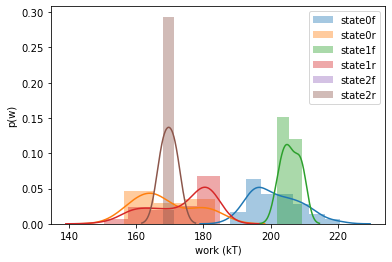

In [55]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

        
    # Plot work distributions
    for i in [0, 1, 2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

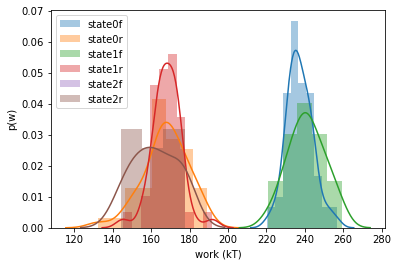

In [56]:
# Plot work distributions
plt.clf()
for i in [0, 1, 2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [57]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(energy) # Change to exp(-energy*-1)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['apo'] - d_dgs_phase['complex']

In [58]:
import tqdm
states_apo = [0, 1]
states_complex = [0, 1]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [01:16<00:00, 130.99it/s]


In [59]:
dgs_state_all_T42A = dgs_state_all

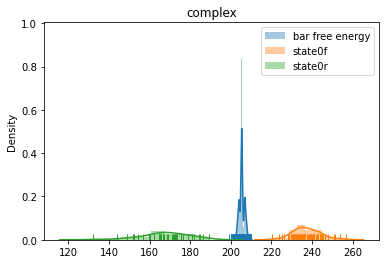

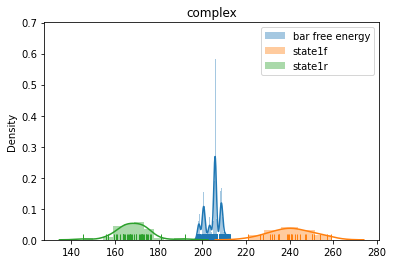

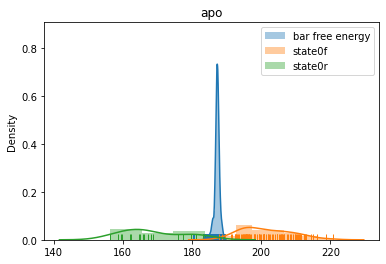

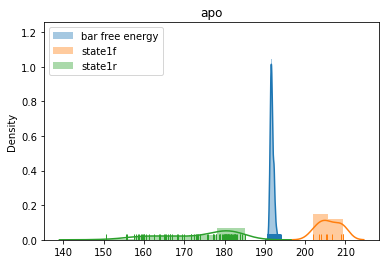

In [60]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

### Compare states Q83R vs R83Q

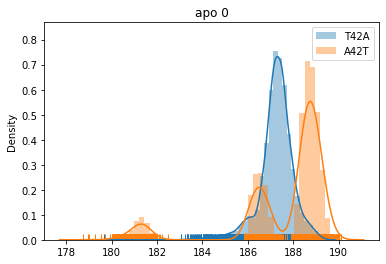

In [61]:
states = [0]
phases = ['apo']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()

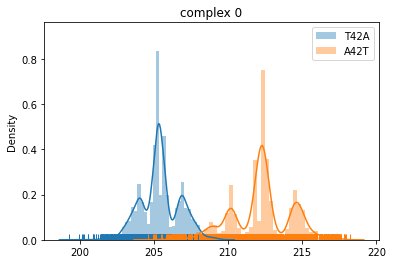

In [62]:
states = [0]
phases = ['complex']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()

## Extract traj

### D39A complex reverse traj with work close to 160

In [1]:
import mdtraj as md
import pickle
import os
import numpy as np
from simtk import unit

In [21]:
# Get positions from eq positions of each cycle (positions are solute only)

outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/72/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir)) 
with open(os.path.join(outdir, f"{i}_{phase}_62_reverse_neq_old.npy"), "rb") as f:
    pos_reverse_old = np.load(f)
    

In [3]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [14]:
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])

In [15]:
htf._topology_proposal.old_topology.setPeriodicBoxVectors(box_vectors)

In [16]:
htf._topology_proposal.old_topology.getPeriodicBoxVectors()

Quantity(value=array([[6.7997, 0.    , 0.    ],
       [0.    , 6.7997, 0.    ],
       [0.    , 0.    , 6.7997]]), unit=nanometer)

In [22]:
# Write PDB file using openmm bc it will include box vectors
from simtk.openmm import app
app.PDBFile.writeFile(htf._topology_proposal.old_topology, pos_reverse_old[0], open(os.path.join(outdir, "test.pdb"), 'w'))

In [23]:
# Load pdb into mdtraj
pdb = md.load(os.path.join(outdir, "test.pdb"))

In [24]:
pdb.unitcell_vectors

array([[[6.7997, 0.    , 0.    ],
        [0.    , 6.7997, 0.    ],
        [0.    , 0.    , 6.7997]]], dtype=float32)

In [25]:
traj = md.Trajectory(pos_reverse_old, md.Topology.from_openmm(htf._topology_proposal.old_topology))

In [26]:
traj

<mdtraj.Trajectory with 100 frames, 29474 atoms, 8989 residues, without unitcells at 0x2b65e9ee88d0>

In [27]:
# Set unit cell vectors in traj based on pdb vectors
traj.unitcell_vectors = np.repeat(pdb.unitcell_vectors, 100, axis=0)

In [28]:
traj.image_molecules()

<mdtraj.Trajectory with 100 frames, 29474 atoms, 8989 residues, and unitcells at 0x2b65e9d78f50>

In [30]:
traj.save(os.path.join(outdir, f"{i}_{phase}_62_reverse_neq_old.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_62_reverse_neq_old.pdb"))

### A39D complex forward traj with work close to 140

In [39]:
import mdtraj as md
import pickle
import os
import numpy as np
from simtk import unit

In [40]:
# Get positions from eq positions of each cycle (positions are solute only)

outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/73/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir)) 
with open(os.path.join(outdir, f"{i}_{phase}_80_forward_neq_new.npy"), "rb") as f:
    pos_forward_new = np.load(f)
    

In [41]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [42]:
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])

In [43]:
htf._topology_proposal.old_topology.setPeriodicBoxVectors(box_vectors)

In [44]:
htf._topology_proposal.old_topology.getPeriodicBoxVectors()

Quantity(value=array([[6.7997, 0.    , 0.    ],
       [0.    , 6.7997, 0.    ],
       [0.    , 0.    , 6.7997]]), unit=nanometer)

In [45]:
# Write PDB file using openmm bc it will include box vectors
from simtk.openmm import app
app.PDBFile.writeFile(htf._topology_proposal.new_topology, pos_forward_new[0], open(os.path.join(outdir, "test.pdb"), 'w'))

In [46]:
# Load pdb into mdtraj
pdb = md.load(os.path.join(outdir, "test.pdb"))

In [47]:
pdb.unitcell_vectors

array([[[6.7997, 0.    , 0.    ],
        [0.    , 6.7997, 0.    ],
        [0.    , 0.    , 6.7997]]], dtype=float32)

In [48]:
traj = md.Trajectory(pos_forward_new, md.Topology.from_openmm(htf._topology_proposal.new_topology))

In [49]:
traj

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, without unitcells at 0x2b6652b8b8d0>

In [50]:
# Set unit cell vectors in traj based on pdb vectors
traj.unitcell_vectors = np.repeat(pdb.unitcell_vectors, 100, axis=0)

In [51]:
traj.image_molecules()

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, and unitcells at 0x2b65fc8ed150>

In [52]:
traj.save(os.path.join(outdir, f"{i}_{phase}_80_forward_neq_new.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_80_forward_neq_new.pdb"))

# Grab indices of trajs in D39A complex reverse with works close to -160

In [2]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [3]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [4]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 72
for i in tqdm_notebook([72]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 72
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

In [5]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    

In [11]:
for i, work in enumerate(reverse_complex_accumulated):
    if abs(work) < 165 and abs(work) > 155:
        print(i, work)

48 -157.6725672722674
62 -159.49688095337464
72 -155.455073281715


# Grab indices of trajs in A39D complex forward with works far from -160

In [31]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

INFO:numexpr.utils:Note: detected 72 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 72 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:matplotlib:(private) matplotlib data path: /home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:matplotlib data path: /home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/zhangi/.config/matplotlib
DEBUG:matplotlib:matplotlib version 3.3.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases'

DEBUG:matplotlib:CACHEDIR=/home/zhangi/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/zhangi/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [32]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [33]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 73
for i in tqdm_notebook([73]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


dir: 73
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

In [34]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    

In [38]:
for i, work in enumerate(forward_complex_accumulated):
    if abs(work) > 130:
        print(i, work)

11 -131.0036411382579
17 -133.59138746807292
33 -135.019367829651
36 -132.9313754151517
39 -134.07096241966784
40 -130.1146226969148
47 -134.48549176583415
48 -133.70815831053218
53 -131.8473938485725
79 -136.03946090010166
80 -136.47387534891928
82 -132.0389176488211
84 -131.93493631181718
91 -133.6036721861534
92 -132.05519750766948
